## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [2]:
df = pd.read_csv("Wholesale customers data.csv")

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
## Checking Nulls

df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
## Checking Duplicates

df.duplicated().sum()

0

## Univariate Analysis

### Distribution of Channel

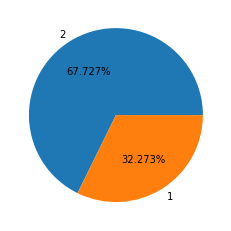

In [6]:
plt.pie(df.Channel.value_counts(),
       labels = df.Channel.unique(),
       autopct = '%0.3f%%');

### Distribution of Region

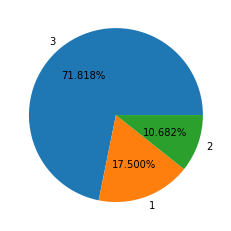

In [7]:
plt.pie(df.Region.value_counts(),
       labels = df.Region.unique(),
       autopct = '%0.3f%%');

### Boxplots

Feature:  Fresh


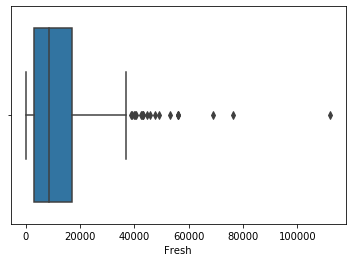

*****************************************************************************************************************************
Feature:  Milk


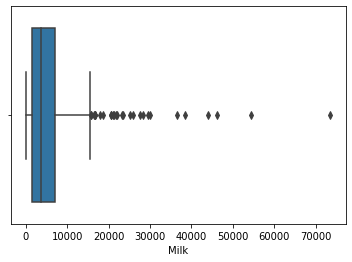

*****************************************************************************************************************************
Feature:  Grocery


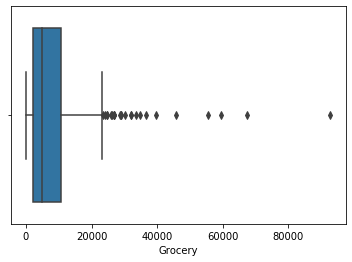

*****************************************************************************************************************************
Feature:  Frozen


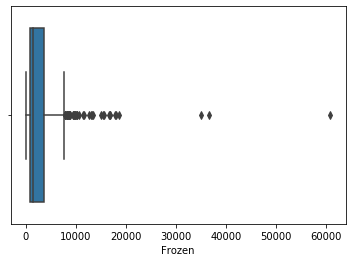

*****************************************************************************************************************************
Feature:  Detergents_Paper


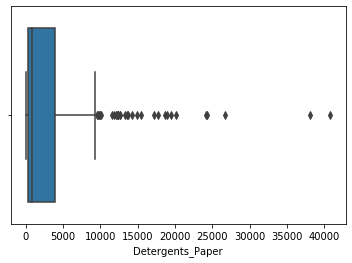

*****************************************************************************************************************************
Feature:  Delicassen


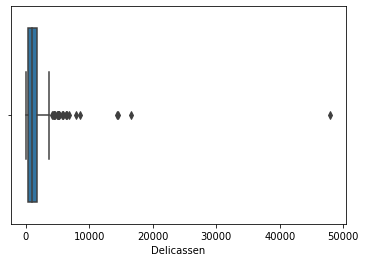

*****************************************************************************************************************************


In [8]:
for col in df.iloc[:, 2:].columns:
    print("Feature: ", col)
    sns.boxplot(df[col])
    plt.show()
    print("*"*125)

Although there are a large number of outliers, but not removing them as they may be representing some high end customers

## Bivariate Analysis

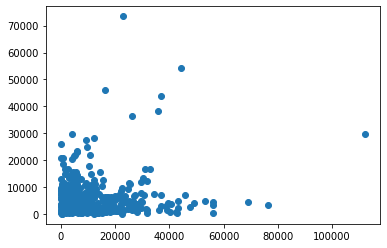

In [9]:
plt.scatter(df.Fresh, df.Milk)
plt.show()

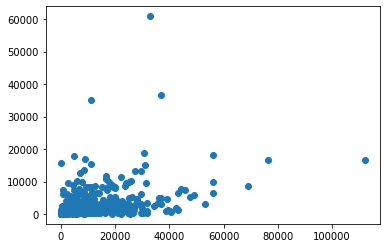

In [10]:
plt.scatter(df.Fresh, df.Frozen)
plt.show()

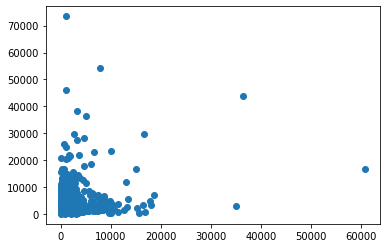

In [11]:
plt.scatter(df.Frozen, df.Milk)
plt.show()

No visible patterns

## Preprocessing

### Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)

### Model Making

In [50]:
from sklearn.cluster import KMeans

### Elbow Curve to determine optimal value of K

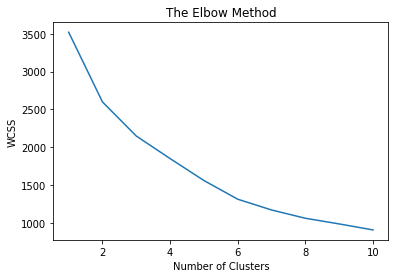

In [14]:
distance = []
k = range(1,11)

for value in k:
    km_model = KMeans(n_clusters = value, random_state = 42)
    km_model.fit(scaled_data)
    distance.append(km_model.inertia_)
    
plt.plot(k, distance)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

2,3 or 5 clusters

### 2 clusters

In [16]:
kmeans2 = KMeans(n_clusters=2, random_state = 42)

In [18]:
y_pred2 = kmeans2.fit_predict(scaled_data)

y_pred2

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [19]:
kmeans2.inertia_

2599.3855593561393

Inertia has increased compared to when outliers were treated. Increased inertia is of course due to presence of outliers.

In [20]:
kmeans2.cluster_centers_

array([[-0.64104498, -0.05158101,  0.12366094, -0.33628412, -0.42241436,
         0.12449116, -0.43800028, -0.09097771],
       [ 1.43292407,  0.11529873, -0.27641856,  0.75169392,  0.94422034,
        -0.27827435,  0.97905944,  0.20336194]])

In [21]:
df['2 clusters result'] = y_pred2

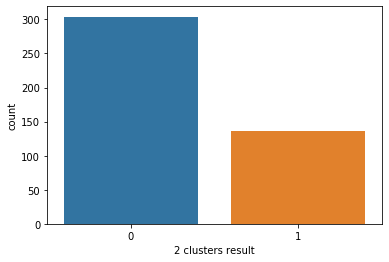

In [22]:
sns.countplot(df['2 clusters result'])

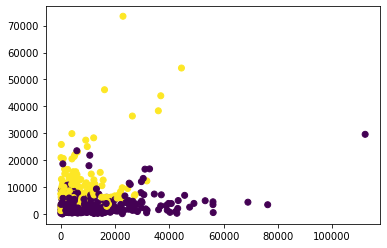

In [36]:
plt.scatter(df.Fresh, df.Milk, c =df['2 clusters result'] )

### Davies Bouldin Score for 2 clusters

In [23]:
import sklearn.metrics

sklearn.metrics.davies_bouldin_score(scaled_data, y_pred2)

1.2603186547850451

### 3 Clusters

In [29]:
kmeans3 = KMeans(n_clusters=3, verbose = True, random_state = 42, max_iter=100)

kmeans3.fit_predict(scaled_data)

Initialization complete
Iteration 0, inertia 2786.786364893938
Iteration 1, inertia 2287.0454281690827
Iteration 2, inertia 2264.324657844577
Iteration 3, inertia 2260.6778767572446
Iteration 4, inertia 2258.3991344479923
Iteration 5, inertia 2257.493636414767
Iteration 6, inertia 2256.316084393402
Iteration 7, inertia 2250.964777477908
Iteration 8, inertia 2246.659689755999
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3033.4742019459145
Iteration 1, inertia 2346.814145640343
Iteration 2, inertia 2302.9599863825115
Iteration 3, inertia 2286.5257879783903
Iteration 4, inertia 2279.0781689641353
Iteration 5, inertia 2276.801599187327
Iteration 6, inertia 2276.676685917986
Iteration 7, inertia 2276.6088301129007
Iteration 8, inertia 2276.197216411781
Iteration 9, inertia 2275.75740939633
Iteration 10, inertia 2275.2772192270695
Iteration 11, inertia 2274.877757621709
Converged at iteration 11: strict convergence.
Initialization complete
Iterat

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [30]:
kmeans3.inertia_

2149.2839562217573

Dereased inertia for 3 clusters

In [31]:
kmeans3.cluster_centers_

array([[-6.83095239e-01, -4.93039862e-02,  8.51425337e-02,
        -3.49638303e-01, -4.31460809e-01,  1.13106103e-01,
        -4.41920675e-01, -1.00330630e-01],
       [ 1.44865163e+00,  1.03304786e-01, -3.03522355e-01,
         4.00468697e-01,  6.27264086e-01, -3.36203224e-01,
         6.52954644e-01,  3.59872191e-03],
       [ 1.11958260e+00,  9.33585924e-02,  1.09004412e+00,
         3.98320348e+00,  3.58457916e+00,  7.77992824e-01,
         3.56664129e+00,  2.25618179e+00]])

In [32]:
y_pred3 = kmeans3.fit_predict(scaled_data)

Initialization complete
Iteration 0, inertia 2786.786364893938
Iteration 1, inertia 2287.0454281690827
Iteration 2, inertia 2264.324657844577
Iteration 3, inertia 2260.6778767572446
Iteration 4, inertia 2258.3991344479923
Iteration 5, inertia 2257.493636414767
Iteration 6, inertia 2256.316084393402
Iteration 7, inertia 2250.964777477908
Iteration 8, inertia 2246.659689755999
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3033.4742019459145
Iteration 1, inertia 2346.814145640343
Iteration 2, inertia 2302.9599863825115
Iteration 3, inertia 2286.5257879783903
Iteration 4, inertia 2279.0781689641353
Iteration 5, inertia 2276.801599187327
Iteration 6, inertia 2276.676685917986
Iteration 7, inertia 2276.6088301129007
Iteration 8, inertia 2276.197216411781
Iteration 9, inertia 2275.75740939633
Iteration 10, inertia 2275.2772192270695
Iteration 11, inertia 2274.877757621709
Converged at iteration 11: strict convergence.
Initialization complete
Iterat

In [33]:
df['3 clusters result'] = y_pred3

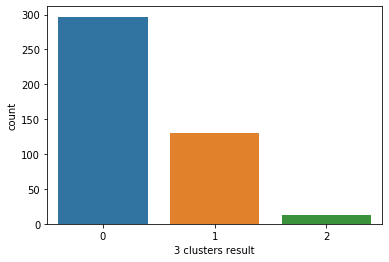

In [34]:
sns.countplot(df['3 clusters result'])

3 clusters don't seem optimal as the last has very less values. These can also be the outliers

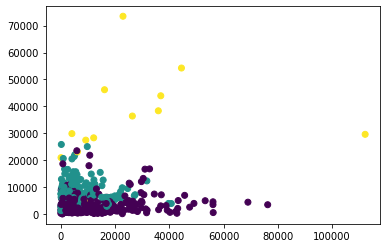

In [35]:
plt.scatter(df.Fresh, df.Milk, c =df['3 clusters result'] )

As interpreted, 3rd cluster comprises of the outliers only

### Davies Bouldin Score for 3 clusters

In [38]:
import sklearn.metrics

sklearn.metrics.davies_bouldin_score(scaled_data, y_pred3)

1.1736367961162066

Has decreased compared to 2 clusters

### 6 Clusters

In [39]:
kmeans6 = KMeans(n_clusters=6, verbose = True, random_state = 42, max_iter=100)

y_pred6 = kmeans6.fit_predict(scaled_data)

Initialization complete
Iteration 0, inertia 1798.414008435038
Iteration 1, inertia 1378.4030695772828
Iteration 2, inertia 1336.9739871818533
Iteration 3, inertia 1321.7323500059392
Iteration 4, inertia 1319.8073095972975
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 2033.2694139976172
Iteration 1, inertia 1508.5567418821577
Iteration 2, inertia 1478.5780452071833
Iteration 3, inertia 1463.4899349283287
Iteration 4, inertia 1457.550146537694
Iteration 5, inertia 1455.2130878182925
Iteration 6, inertia 1454.2209376492356
Iteration 7, inertia 1454.140532836006
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2400.978966428991
Iteration 1, inertia 1489.7376909099282
Iteration 2, inertia 1363.7893364117556
Iteration 3, inertia 1342.3999998568809
Iteration 4, inertia 1336.9156800090273
Iteration 5, inertia 1331.7818893806098
Iteration 6, inertia 1323.6445786788197
Iteration 7, inertia 1319.4965027773924


In [40]:
y_pred6

array([1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3,
       5, 1, 1, 1, 3, 3, 1, 5, 3, 3, 3, 5, 3, 1, 5, 1, 1, 5, 5, 3, 1, 1,
       1, 1, 1, 2, 1, 1, 3, 3, 5, 1, 3, 3, 2, 1, 3, 3, 1, 2, 1, 1, 3, 2,
       3, 1, 3, 3, 3, 5, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 2, 2, 5,
       3, 3, 3, 3, 2, 5, 1, 3, 1, 3, 3, 3, 1, 1, 1, 5, 3, 3, 1, 1, 1, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 5, 5, 3, 1, 3, 5, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1,
       5, 3, 3, 3, 3, 5, 3, 4, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 5, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 5, 3, 3, 5, 3, 3, 1, 3, 1, 5, 5, 5, 5,
       3, 3, 3, 5, 3, 3, 3, 1, 0, 1, 0, 1, 1, 0, 1,

In [41]:
kmeans6.inertia_

1314.8913838359522

Inertia has decreased further

In [44]:
kmeans6.cluster_centers_

array([[-5.67368999e-01, -1.57920251e+00, -1.11632825e-01,
        -3.54548397e-01, -4.04418651e-01,  3.33152868e-02,
        -4.24041671e-01, -1.52151186e-01],
       [ 1.44865163e+00,  1.66562579e-01, -3.35427763e-01,
         4.58126517e-01,  6.73224816e-01, -3.49684911e-01,
         6.89164252e-01,  4.76614618e-02],
       [ 1.44865163e+00, -5.58343155e-02,  3.13830315e-01,
         3.92190593e+00,  4.27561037e+00, -3.57419457e-03,
         4.61816580e+00,  5.03365339e-01],
       [-6.90297086e-01,  5.90668285e-01, -2.16616886e-01,
        -3.80006924e-01, -4.76249417e-01, -8.32741037e-02,
        -4.44672309e-01, -1.79350114e-01],
       [-6.90297086e-01,  5.90668285e-01,  1.96681731e+00,
         5.17550306e+00,  1.28721685e+00,  6.90059988e+00,
        -5.54861977e-01,  1.64784475e+01],
       [-5.77720838e-01,  2.84430211e-01,  2.24499548e+00,
        -7.35112400e-02, -2.04298800e-01,  1.28561554e+00,
        -4.02219973e-01,  4.70290526e-01]])

In [45]:
df['6 clusters result'] = y_pred6

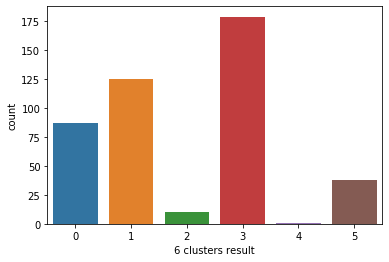

In [46]:
sns.countplot(df['6 clusters result'])

Doesn't really seem to be a good clustering

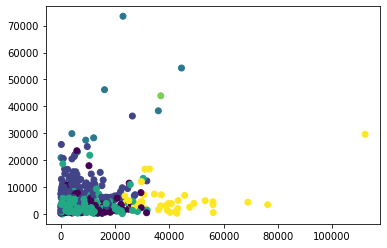

In [47]:
plt.scatter(df.Fresh, df.Milk, c =df['6 clusters result'] )

Not very distinct clusters. 6 doesn't seem to be an optimal value of k

### Davies Bouldin Score for 6 clusters

In [48]:
sklearn.metrics.davies_bouldin_score(scaled_data, y_pred6)

0.9310666961331654

Has drastically dropped